# Sentiment Analysis on IMDB Reviews using LSTM and Keras
created by Madan Surthani
<hr>

### Steps
<ol type="1">
    <li>Load the dataset (50K IMDB Movie Review)</li>
    <li>Clean Dataset</li>
    <li>Encode Sentiments</li>
    <li>Split Dataset</li>
    <li>Tokenize and Pad/Truncate Reviews</li>
    <li>Build Architecture/Model</li>
    <li>Train and Test</li>
</ol>

<hr>
<i>Import all the libraries needed</i>

In [1]:
import pandas as pd    # to load dataset
import numpy as np     # for mathematic equation
from nltk.corpus import stopwords   # to get collection of stopwords
from sklearn.model_selection import train_test_split       # for splitting dataset
from tensorflow.keras.preprocessing.text import Tokenizer  # to encode text to int
from tensorflow.keras.preprocessing.sequence import pad_sequences   # to do padding or truncating
from tensorflow.keras.models import Sequential     # the model
from tensorflow.keras.layers import Embedding, LSTM, Dense # layers of the architecture
from tensorflow.keras.callbacks import ModelCheckpoint   # save model
from tensorflow.keras.models import load_model   # load saved model
import re

<hr>
<i>Preview dataset</i>

In [4]:
data = pd.read_csv(r"C:\Users\smkon\Downloads\IMDB Dataset.csv\IMDB.csv")

print(data)

                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]


In [6]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
data.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


<hr>
<b>Stop Word</b> is a commonly used words in a sentence, usually a search engine is programmed to ignore this words (i.e. "the", "a", "an", "of", etc.)

<i>Declaring the english stop words</i>

In [3]:
english_stops = set(stopwords.words('english'))

## Performing EDA

In [7]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [8]:
data.size

100000

In [9]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [10]:
data["sentiment"].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [11]:

import missingno as msno

<Axes: >

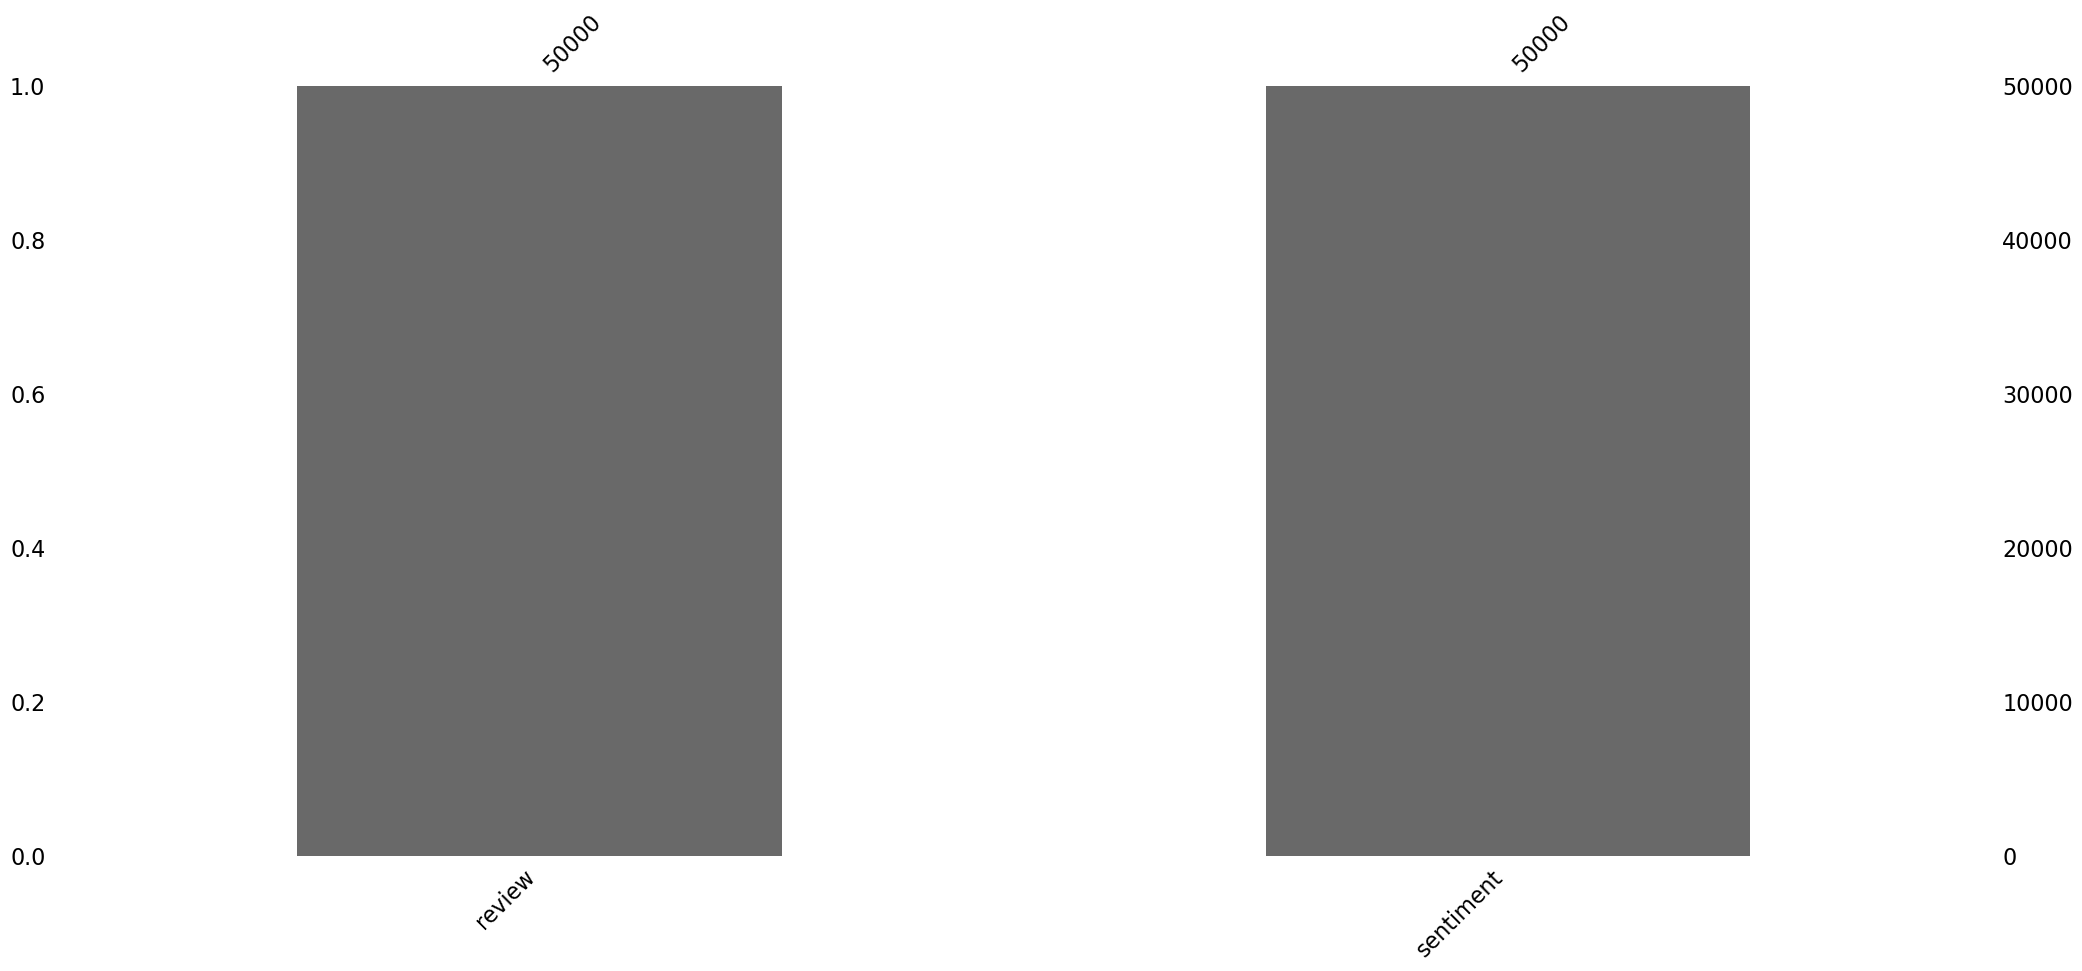

In [12]:
msno.bar(data)

In [13]:
data[data["sentiment"]== "positive"]

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
...,...,...
49983,"I loved it, having been a fan of the original ...",positive
49985,Imaginary Heroes is clearly the best film of t...,positive
49989,I got this one a few weeks ago and love it! It...,positive
49992,John Garfield plays a Marine who is blinded by...,positive


In [14]:
data[data["sentiment"]== "negative"]

,review,sentiment
3,Basically there's a family where a little boy ...,negative
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
10,Phil the Alien is one of those quirky films wh...,negative
11,I saw this movie when I was about 12 when it c...,negative
...,...,...
49994,This is your typical junk comedy.<br /><br />T...,negative
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Sentiment distribution')

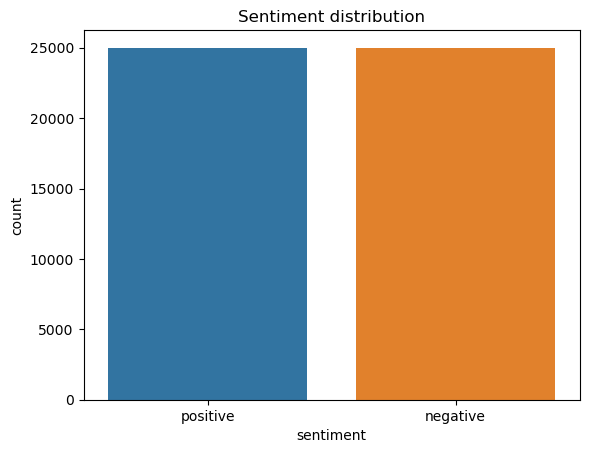

In [15]:
sns.countplot(x='sentiment', data=data)
plt.title("Sentiment distribution")

In [16]:
for i in range(5):
    print("Review: ", [i])
    print(data['review'].iloc[i], "\n")
    print("Sentiment: ", data['sentiment'].iloc[i], "\n\n")

Review:  [0]
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is d

In [17]:
def no_of_words(text):
    words= text.split()
    word_count = len(words)
    return word_count

In [18]:
data['word count'] = data['review'].apply(no_of_words)

In [19]:
data

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230
...,...,...,...
49995,I thought this movie did a down right good job...,positive,194
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,112
49997,I am a Catholic taught in parochial elementary...,negative,230
49998,I'm going to have to disagree with the previou...,negative,212


In [22]:
duplicated_count = data.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)


Number of duplicate entries:  418


<hr>

### Load and Clean Dataset

In the original dataset, the reviews are still dirty. There are still html tags, numbers, uppercase, and punctuations. This will not be good for training, so in <b>load_dataset()</b> function, beside loading the dataset using <b>pandas</b>, I also pre-process the reviews by removing html tags, non alphabet (punctuations and numbers), stop words, and lower case all of the reviews.

### Encode Sentiments
In the same function, I also encode the sentiments into integers (0 and 1). Where 0 is for negative sentiments and 1 is for positive sentiments.

In [4]:
def load_dataset():
    df = pd.read_csv('IMDB Dataset.csv')
    x_data = df['review']       # Reviews/Input
    y_data = df['sentiment']    # Sentiment/Output

    # PRE-PROCESS REVIEW
    x_data = x_data.replace({'<.*?>': ''}, regex = True)          # remove html tag
    x_data = x_data.replace({'[^A-Za-z]': ' '}, regex = True)     # remove non alphabet
    x_data = x_data.apply(lambda review: [w for w in review.split() if w not in english_stops])  # remove stop words
    x_data = x_data.apply(lambda review: [w.lower() for w in review])   # lower case
    
    # ENCODE SENTIMENT -> 0 & 1
    y_data = y_data.replace('positive', 1)
    y_data = y_data.replace('negative', 0)

    return x_data, y_data

x_data, y_data = load_dataset()

print('Reviews')
print(x_data, '\n')
print('Sentiment')
print(y_data)

Reviews
0        [one, reviewers, mentioned, watching, oz, epis...
1        [a, wonderful, little, production, the, filmin...
2        [i, thought, wonderful, way, spend, time, hot,...
3        [basically, family, little, boy, jake, thinks,...
4        [petter, mattei, love, time, money, visually, ...
                               ...                        
49995    [i, thought, movie, right, good, job, it, crea...
49996    [bad, plot, bad, dialogue, bad, acting, idioti...
49997    [i, catholic, taught, parochial, elementary, s...
49998    [i, going, disagree, previous, comment, side, ...
49999    [no, one, expects, star, trek, movies, high, a...
Name: review, Length: 50000, dtype: object 

Sentiment
0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64


## Apply label Encoder 

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["sentiment"]= le.fit_transform(data["sentiment"])
data["sentiment"]

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int32

In [24]:
data

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,0,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230
...,...,...,...
49995,I thought this movie did a down right good job...,1,194
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0,112
49997,I am a Catholic taught in parochial elementary...,0,230
49998,I'm going to have to disagree with the previou...,0,212


## Divided data into Dependent and independent 

In [26]:
x=data["review"]
y=data["sentiment"]

In [28]:
x

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [27]:
y

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int32

<hr>

### Split Dataset
In this work, I decided to split the data into 80% of Training and 20% of Testing set using <b>train_test_split</b> method from Scikit-Learn. By using this method, it automatically shuffles the dataset. We need to shuffle the data because in the original dataset, the reviews and sentiments are in order, where they list positive reviews first and then negative reviews. By shuffling the data, it will be distributed equally in the model, so it will be more accurate for predictions.

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2)

print('Train Set')
print(x_train, '\n')
print(x_test, '\n')
print('Test Set')
print(y_train, '\n')
print(y_test)

Train Set
38079    [i, found, tremendously, disappointing, versio...
2530     [i, actually, start, watching, show, came, fx,...
3470     [this, worst, movie, i, ever, seen, believe, i...
44760    [first, let, say, i, way, denying, importance,...
8331     [fay, sister, notorious, nobel, prize, winning...
                               ...                        
37373    [this, movie, family, jimmy, morris, lived, dr...
29271    [the, fact, movie, made, way, rentalrack, norw...
9956     [camp, blood, looked, great, i, buying, i, wat...
28716    [i, hate, this, movie, i, never, seen, utter, ...
33574    [a, crackling, magnificent, thriller, child, p...
Name: review, Length: 40000, dtype: object 

7679     [long, terri, schiavo, brought, issue, living,...
44919    [this, movie, poorly, acted, what, jeff, bridg...
42008    [with, hype, surrounding, stars, movie, movie,...
22240    [johnny, dangerously, falls, completely, hit, ...
43307    [this, movie, based, bible, it, completely, le...
 

<hr>
<i>Function for getting the maximum review length, by calculating the mean of all the reviews length (using <b>numpy.mean</b>)</i>

In [6]:
def get_max_length():
    review_length = []
    for review in x_train:
        review_length.append(len(review))

    return int(np.ceil(np.mean(review_length)))

In [29]:
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize 

In [30]:
#setting stopwords to english
stop_wr=set(stopwords.words("english"))
print(stop_wr)

{'up', 'if', 'of', 'own', "shouldn't", 'his', 'once', 'we', 'each', 'my', 'had', 'only', 'their', 'some', 'weren', 'does', 'and', "that'll", 'have', 'just', 'about', 'do', 'are', 'all', 'herself', "haven't", 'same', 'ourselves', 'was', 'when', "she's", 'll', 'can', 'needn', "it's", 'were', 'against', "wouldn't", 'm', 'shan', 'those', 'this', 'me', 'himself', 'him', 'down', 'our', "won't", 'they', 'for', 'through', 'isn', 'wouldn', 'with', 'yourself', 'hers', 'been', 'should', 'more', 've', 'your', 'other', 'after', 'nor', 'until', 'that', 'haven', 'few', 'them', 'its', 'did', 't', 'is', 'it', 'above', 'during', 'out', 'than', 'having', 'am', 'a', 'these', 'mightn', 'not', 'before', 'doesn', 'as', 'i', "hasn't", "you'll", 'theirs', 'while', 'but', "don't", 'in', 'you', 'wasn', 'ain', 'be', "shan't", 'very', 'the', 'between', 'over', 'itself', 'such', 'couldn', 'because', 'under', "should've", 'he', 'myself', 'yours', 'here', 'her', 'where', 'too', 'again', 'both', "couldn't", 'hasn', 'b

<hr>

### Tokenize and Pad/Truncate Reviews
A Neural Network only accepts numeric data, so we need to encode the reviews. I use <b>tensorflow.keras.preprocessing.text.Tokenizer</b> to encode the reviews into integers, where each unique word is automatically indexed (using <b>fit_on_texts</b> method) based on <b>x_train</b>. <br>
<b>x_train</b> and <b>x_test</b> is converted into integers using <b>texts_to_sequences</b> method.

Each reviews has a different length, so we need to add padding (by adding 0) or truncating the words to the same length (in this case, it is the mean of all reviews length) using <b>tensorflow.keras.preprocessing.sequence.pad_sequences</b>.


<b>post</b>, pad or truncate the words in the back of a sentence<br>
<b>pre</b>, pad or truncate the words in front of a sentence

In [7]:
# ENCODE REVIEW
token = Tokenizer(lower=False)    # no need lower, because already lowered the data in load_data()
token.fit_on_texts(x_train)
x_train = token.texts_to_sequences(x_train)
x_test = token.texts_to_sequences(x_test)

max_length = get_max_length()

x_train = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')

total_words = len(token.word_index) + 1   # add 1 because of 0 padding

print('Encoded X Train\n', x_train, '\n')
print('Encoded X Test\n', x_test, '\n')
print('Maximum review length: ', max_length)

Encoded X Train
 [[    1   160  5903 ...     0     0     0]
 [    1    75   274 ...     0     0     0]
 [    8   158     3 ...     0     0     0]
 ...
 [ 1204   445   478 ...     0     0     0]
 [    1   635     8 ...   465 54860   842]
 [   39 19102  1829 ...     0     0     0]] 

Encoded X Test
 [[  102 14593 83071 ...     0     0     0]
 [    8     3   780 ...     0     0     0]
 [  421  3299  3255 ...     0     0     0]
 ...
 [    1    38    81 ...     0     0     0]
 [    1   947    46 ...     0     0     0]
 [ 1062     3  2808 ...     0     0     0]] 

Maximum review length:  130


<hr>

### Build Architecture/Model
<b>Embedding Layer</b>: in simple terms, it creates word vectors of each word in the <i>word_index</i> and group words that are related or have similar meaning by analyzing other words around them.

<b>LSTM Layer</b>: to make a decision to keep or throw away data by considering the current input, previous output, and previous memory. There are some important components in LSTM.
<ul>
    <li><b>Forget Gate</b>, decides information is to be kept or thrown away</li>
    <li><b>Input Gate</b>, updates cell state by passing previous output and current input into sigmoid activation function</li>
    <li><b>Cell State</b>, calculate new cell state, it is multiplied by forget vector (drop value if multiplied by a near 0), add it with the output from input gate to update the cell state value.</li>
    <li><b>Ouput Gate</b>, decides the next hidden state and used for predictions</li>
</ul>

<b>Dense Layer</b>: compute the input with the weight matrix and bias (optional), and using an activation function. I use <b>Sigmoid</b> activation function for this work because the output is only 0 or 1.

The optimizer is <b>Adam</b> and the loss function is <b>Binary Crossentropy</b> because again the output is only 0 and 1, which is a binary number.

In [8]:
# ARCHITECTURE
EMBED_DIM = 32
LSTM_OUT = 64

model = Sequential()
model.add(Embedding(total_words, EMBED_DIM, input_length = max_length))
model.add(LSTM(LSTM_OUT))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 130, 32)           2952960   
_________________________________________________________________
lstm (LSTM)                  (None, 64)                24832     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 2,977,857
Trainable params: 2,977,857
Non-trainable params: 0
_________________________________________________________________
None


<hr>

### Training
For training, it is simple. We only need to fit our <b>x_train</b> (input) and <b>y_train</b> (output/label) data. For this training, I use a mini-batch learning method with a <b>batch_size</b> of <i>128</i> and <i>5</i> <b>epochs</b>.

Also, I added a callback called **checkpoint** to save the model locally for every epoch if its accuracy improved from the previous epoch.

In [9]:
checkpoint = ModelCheckpoint(
    'models/LSTM.h5',
    monitor='accuracy',
    save_best_only=True,
    verbose=1
)

In [10]:
model.fit(x_train, y_train, batch_size = 128, epochs = 5, callbacks=[checkpoint])

Train on 40000 samples
Epoch 1/5
39808/40000 [============================>.] - ETA: 0s - loss: 0.5096 - accuracy: 0.7128
Epoch 00001: accuracy improved from -inf to 0.71360, saving model to models/LSTM.h5
40000/40000 [==============================] - 13s 327us/sample - loss: 0.5087 - accuracy: 0.7136
Epoch 2/5
39808/40000 [============================>.] - ETA: 0s - loss: 0.2301 - accuracy: 0.9157
Epoch 00002: accuracy improved from 0.71360 to 0.91570, saving model to models/LSTM.h5
40000/40000 [==============================] - 10s 257us/sample - loss: 0.2302 - accuracy: 0.9157
Epoch 3/5
39808/40000 [============================>.] - ETA: 0s - loss: 0.1344 - accuracy: 0.9584
Epoch 00003: accuracy improved from 0.91570 to 0.95837, saving model to models/LSTM.h5
40000/40000 [==============================] - 11s 280us/sample - loss: 0.1345 - accuracy: 0.9584
Epoch 4/5
39808/40000 [============================>.] - ETA: 0s - loss: 0.0848 - accuracy: 0.9762
Epoch 00004: accuracy improve

<hr>

### Testing
To evaluate the model, we need to predict the sentiment using our <b>x_test</b> data and comparing the predictions with <b>y_test</b> (expected output) data. Then, we calculate the accuracy of the model by dividing numbers of correct prediction with the total data. Resulted an accuracy of <b>86.63%</b>

In [11]:
y_pred = model.predict_classes(x_test, batch_size = 128)

true = 0
for i, y in enumerate(y_test):
    if y == y_pred[i]:
        true += 1

print('Correct Prediction: {}'.format(true))
print('Wrong Prediction: {}'.format(len(y_pred) - true))
print('Accuracy: {}'.format(true/len(y_pred)*100))

Correct Prediction: 8609
Wrong Prediction: 1391
Accuracy: 86.09


---

### Load Saved Model

Load saved model and use it to predict a movie review statement's sentiment (positive or negative).

In [12]:
loaded_model = load_model('models/LSTM.h5')

Receives a review as an input to be predicted

In [13]:
review = str(input('Movie Review: '))

Movie Review: Nothing was typical about this. Everything was beautifully done in this movie, the story, the flow, the scenario, everything. I highly recommend it for mystery lovers, for anyone who wants to watch a good movie!


The input must be pre processed before it is passed to the model to be predicted

In [14]:
# Pre-process input
regex = re.compile(r'[^a-zA-Z\s]')
review = regex.sub('', review)
print('Cleaned: ', review)

words = review.split(' ')
filtered = [w for w in words if w not in english_stops]
filtered = ' '.join(filtered)
filtered = [filtered.lower()]

print('Filtered: ', filtered)

Cleaned:  Nothing was typical about this Everything was beautifully done in this movie the story the flow the scenario everything I highly recommend it for mystery lovers for anyone who wants to watch a good movie
Filtered:  ['nothing typical everything beautifully done movie story flow scenario everything i highly recommend mystery lovers anyone wants watch good movie']


Once again, we need to tokenize and encode the words. I use the tokenizer which was previously declared because we want to encode the words based on words that are known by the model.

In [15]:
tokenize_words = token.texts_to_sequences(filtered)
tokenize_words = pad_sequences(tokenize_words, maxlen=max_length, padding='post', truncating='post')
print(tokenize_words)

[[  76  708  173 1155  127    3   13 2751 2656  173    1  449  281  701
  1710  153  401   33    9    3    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]]


This is the result of the prediction which shows the **confidence score** of the review statement.

In [16]:
result = loaded_model.predict(tokenize_words)
print(result)

[[0.9971666]]


If the confidence score is close to 0, then the statement is **negative**. On the other hand, if the confidence score is close to 1, then the statement is **positive**. I use a threshold of **0.7** to determine which confidence score is positive and negative, so if it is equal or greater than 0.7, it is **positive** and if it is less than 0.7, it is **negative**

In [17]:
if result >= 0.7:
    print('positive')
else:
    print('negative')

positive
